<a href="https://colab.research.google.com/github/a01762925/datasets/blob/main/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisis of medical cost in the US.




In [ ]:
y = 'https://raw.githubusercontent.com/a01762925/datasets/main/insurance.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(y)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## 2. Description of the variables

* 'age' - age of primary beneficiary.
* 'sex' - insurance contractor gender, female, male.
* 'bmi' - BMI (Body Mass Index) is a number that relates a person's weight to their height. It's used to classify if someone is underweight, normal weight, overweight, or obese, but it doesn't consider factors like muscle or fat distribution.
* 'children' - do the respective policyholders have children
* 'smoker' - do they smoke ?
* 'region' - out of which part of the united States are they?
* 'charges' - Individual medical costs billed by health insurance per calender year

Datatypes for each variable as seen above.

In [20]:

rows, columns = df.shape
print("Amount of rows:", rows)
print("Amount of columns:", columns)


Amount of rows: 1338
Amount of columns: 7


In [21]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

## Every column and row have enough data in it.

## Question 1: Does smoking have an influence on the amount of the Charges? Comparison between male and female

In [39]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 2})

In [52]:
amount_smoker = (df['smoker'] == 1).sum()
amount_nonesmoker = (df['smoker'] == 2).sum()
print(amount_smoker)
print(amount_nonesmoker)

274
1064


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


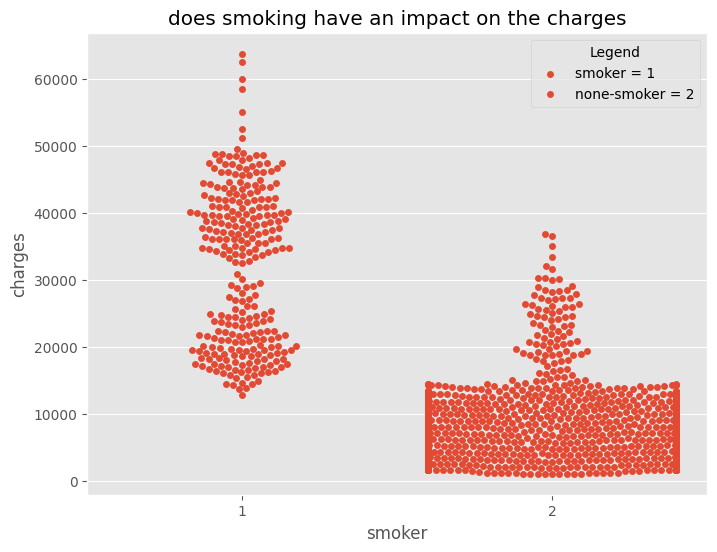

In [46]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='smoker', y='charges', data=df)
plt.title('does smoking have an impact on the charges')
plt.legend(title='Legend', labels=['smoker = 1', 'none-smoker = 2'])
plt.show()

## Answer to Question 1: As you can see, smoking definitely has an impact on the cost of hospital bills. Basically, there are more non-smokers than smokers. Therefore, we can see, that healthcare cost is significant higher for smokers.

## Question 2: Is the distribution of BMI between female and male the same?

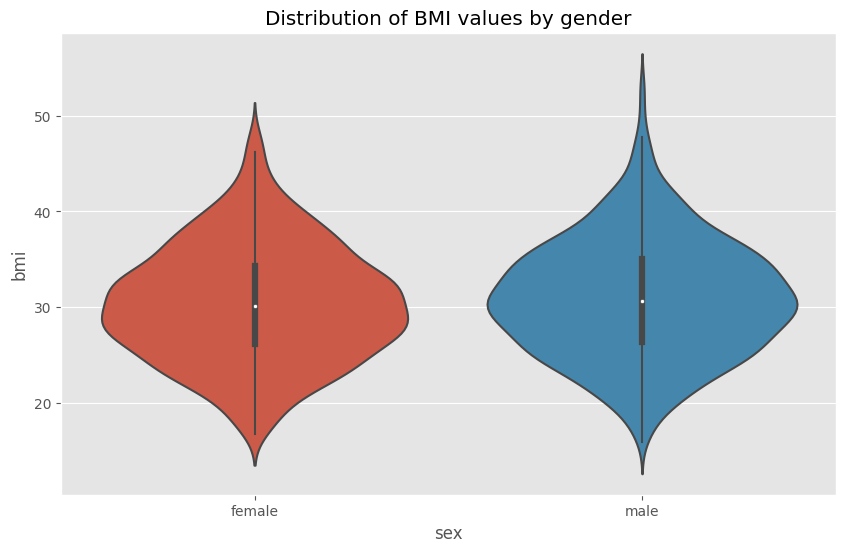

In [60]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='bmi', data=df)
plt.xlabel('sex')
plt.ylabel('bmi')
plt.title('Distribution of BMI values by gender')
plt.show()


## Answer to Question 2: It can be seen that the distribution of the BMI between men and women is basically the same. The bulbous shape shows that the majority of males and females are in the healthy BMI range. The shape of the female tapers less towards the top than that of the male. However, the largest outlier and thus the highest BMI is found in males.

## Question 3: Are the costs related to the number of children or to their age?

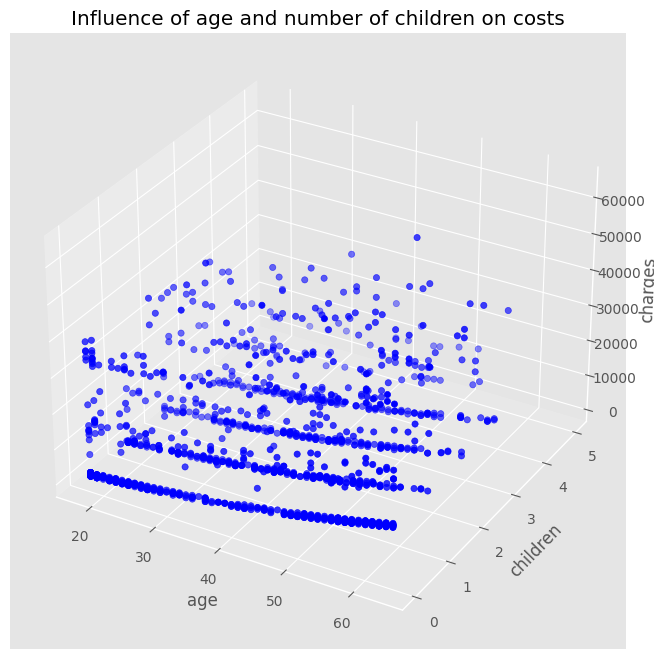

In [86]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['children'], df['charges'], c='b', marker='o')

ax.set_xlabel('age')
ax.set_ylabel('children')
ax.set_zlabel('charges')
ax.set_title('Influence of age and number of children on costs')
plt.show()

## Answer to Question 3: Through the curved dots you can see that people are having children as they get older. However, it cannot be said that the number of children is related to the level of costs, nor does there seem to be a connection between age and costs, which is rather unusual. There are also outliers in the level of costs among young people without children. So there seems to be a small variance.

## source of the dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance